### Merge confusion matrix of the 6 bandas of a DataSet

- Main_Folder
   - {model}{dataset}{band}
       - confusion_matrix.png
       - score_metrix.txt



[PosixPath('Models_results/rf-2305222212u/score_metrics.txt'),
 PosixPath('Models_results/rf-2305222212g/score_metrics.txt'),
 PosixPath('Models_results/rf-2305222212r/score_metrics.txt'),
 PosixPath('Models_results/rf-2305222212i/score_metrics.txt'),
 PosixPath('Models_results/rf-2305222212z/score_metrics.txt'),
 PosixPath('Models_results/rf-2305222212Y/score_metrics.txt')]

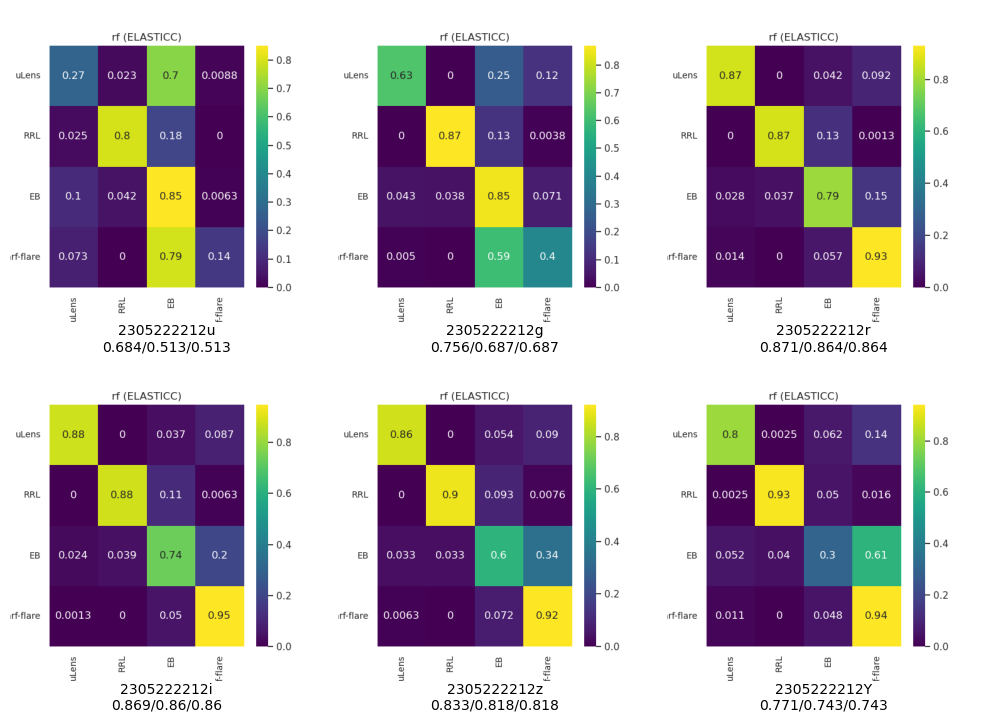

In [62]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

main_folder = "Models_results"
model = "rf"
runs = [folder for folder in os.listdir(main_folder) if (not ".ipynb" in folder) and (not ".png" in folder) and (model in folder) and (not "Anibal" in folder)]
# runs = [folder for folder in os.listdir(main_folder) if (not ".ipynb" in folder) and (not ".png" in folder) and ((model in folder) or ("r" == folder[-1]))]
# runs = runs[:3]+[runs[-1],runs[3],runs[-2]]   # For comparation with Anibal's Results
figure_paths = []
score_paths = []
for run in runs:
    figure_paths.append([Path(main_folder, run, fig) for fig in os.listdir(Path(main_folder, run)) if ".png" in fig ][0])
    score_paths.append(Path(main_folder, run, "score_metrics.txt"))
fig, axs = plt.subplots(2, 3, figsize=(10,7.5))   # 2x3

for i, (fig, score) in enumerate(zip(figure_paths, score_paths)):
    with open(score, "r") as sc:
        scores = sc.read().split("\n")
    presicion = scores[0].split(" ")[-1]
    recall = scores[1].split(" ")[-1]
    accuracy = scores[2].split(" ")[-1]
    img = mpimg.imread(fig)
    row = i // 3           # 2x3
    col = i % 3   
    image_name = str(fig).split("/")[1].split("-")[1]
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].text(0.5, -0.05, f"{image_name}\n{presicion}/{recall}/{accuracy}" , transform=axs[row, col].transAxes,
                       horizontalalignment='center', verticalalignment='center')
# plt.subplots_adjust(wspace=0.1, hspace=0.0005)
plt.tight_layout()    # Adjust the spacing between subplots
plt.savefig(Path(main_folder, "CM-" +run[:-1]+ '.png'))
# plt.savefig(Path(main_folder, "CM-" +model+ '.png')) # For comparation with Anibal's Results
score_paths

### Data Frame of combinations (model+dataset+band) and scores
Bar plot of scores per (DataSet, Model, Band)

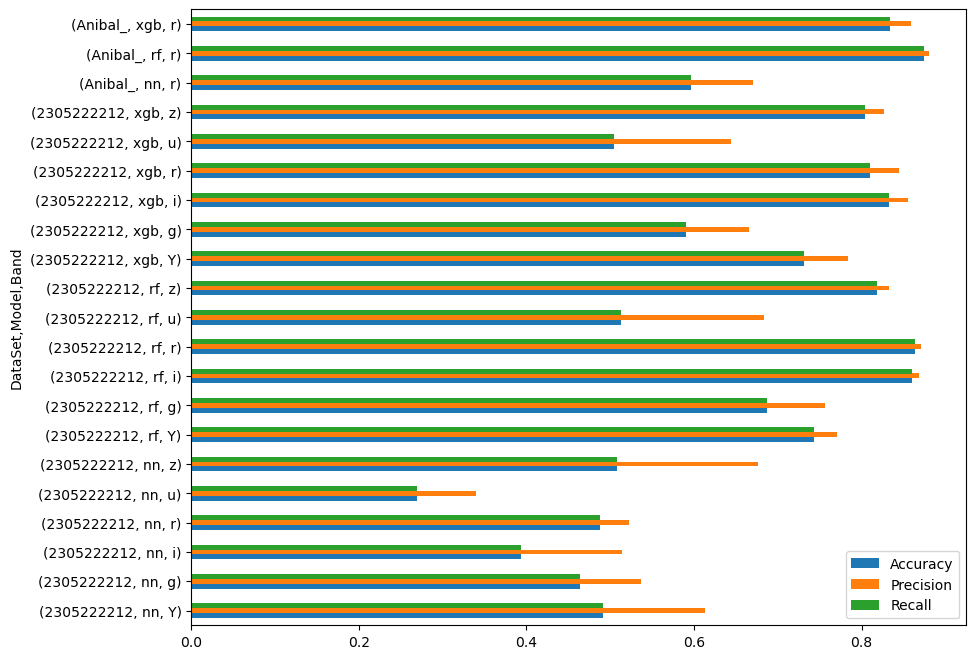

In [188]:
import pandas as pd
main_folder = "Models_results"
model = "Anibal"
runs = [folder for folder in os.listdir(main_folder) if (not ".ipynb" in folder) and (not ".png" in folder)]
score_paths = []
df = pd.DataFrame(columns=["Model", "DataSet","Band", "Precision", "Recall", "Accuracy"])  # Define column names

for run in runs:
    with open(Path(main_folder, run, "score_metrics.txt"), "r") as sc:
        scores = sc.read().split("\n")
    presicion = float(scores[0].split(" ")[-1])
    recall = float(scores[1].split(" ")[-1])
    accuracy = float(scores[2].split(" ")[-1])
    df.loc[len(df)] = pd.Series({"Model": run.split("-")[0], "DataSet":  run.split("-")[1][:-1], "Band": run.split("-")[1].split("_")[-1][-1], "Precision":presicion , "Recall": recall, "Accuracy":accuracy })
pivot_df = df.pivot_table(index=["DataSet", "Model", "Band"], values=["Precision", "Recall", "Accuracy"])
# df.groupby(["DataSet", "Model"]).plot("Band", kind = "bar", figsize=(5,5))
pivot_df.plot(kind="barh", figsize=(10, 8))
plt.savefig(Path(main_folder, "Scores.png"))


### Columns of all_features_.txt and MicroLIA_Training_Set.csv

In [209]:
text = "AndersonDarling, FluxPercentileRatioMid20, FluxPercentileRatioMid35, FluxPercentileRatioMid50, FluxPercentileRatioMid65, FluxPercentileRatioMid80, Gskew, LinearTrend, MaxSlope, PairSlopeTrend, PercentAmplitude, PercentDifferenceFluxPercentile, above1, above3, above5, abs_energy, abs_sum_changes, amplitude, auto_corr, below1, below3, below5, benford_correlation, c3, check_for_duplicate, check_for_max_duplicate, check_for_min_duplicate, check_max_last_loc, check_min_last_loc, complexity, con, count_above, count_below, cusum, first_loc_max, first_loc_min, half_mag_amplitude_ratio, index_mass_quantile, integrate, kurtosis, large_standard_deviation, longest_strike_above, longest_strike_below, meanMag, mean_abs_change, mean_change, mean_n_abs_max, mean_second_derivative, medianAbsDev, median_buffer_range, median_distance, number_cwt_peaks, number_of_crossings, number_of_peaks, peak_detection, permutation_entropy, quantile, ratio_recurring_points, root_mean_squared, sample_entropy, shannon_entropy, shapiro_wilk, skewness, std_over_mean, stetsonJ, stetsonK, stetsonL, sum_values, symmetry_looking, time_reversal_asymmetry, variance, variance_larger_than_standard_deviation, variation_coefficient, vonNeumannRatio, AndersonDarling_deriv, FluxPercentileRatioMid20_deriv, FluxPercentileRatioMid35_deriv, FluxPercentileRatioMid50_deriv, FluxPercentileRatioMid65_deriv, FluxPercentileRatioMid80_deriv, Gskew_deriv, LinearTrend_deriv, MaxSlope_deriv, PairSlopeTrend_deriv, PercentAmplitude_deriv, PercentDifferenceFluxPercentile_deriv, above1_deriv, above3_deriv, above5_deriv, abs_energy_deriv, abs_sum_changes_deriv, amplitude_deriv, auto_corr_deriv, below1_deriv, below3_deriv, below5_deriv, benford_correlation_deriv, c3_deriv, check_for_duplicate_deriv, check_for_max_duplicate_deriv, check_for_min_duplicate_deriv, check_max_last_loc_deriv, check_min_last_loc_deriv, complexity_deriv, con_deriv, count_above_deriv, count_below_deriv, cusum_deriv, first_loc_max_deriv, first_loc_min_deriv, half_mag_amplitude_ratio_deriv, index_mass_quantile_deriv, integrate_deriv, kurtosis_deriv, large_standard_deviation_deriv, longest_strike_above_deriv, longest_strike_below_deriv, meanMag_deriv, mean_abs_change_deriv, mean_change_deriv, mean_n_abs_max_deriv, mean_second_derivative_deriv, medianAbsDev_deriv, median_buffer_range_deriv, median_distance_deriv, number_cwt_peaks_deriv, number_of_crossings_deriv, number_of_peaks_deriv, peak_detection_deriv, permutation_entropy_deriv, quantile_deriv, ratio_recurring_points_deriv, root_mean_squared_deriv, sample_entropy_deriv, shannon_entropy_deriv, shapiro_wilk_deriv, skewness_deriv, std_over_mean_deriv, stetsonJ_deriv, stetsonK_deriv, stetsonL_deriv, sum_values_deriv, symmetry_looking_deriv, time_reversal_asymmetry_deriv, variance_deriv, variance_larger_than_standard_deviation_deriv, variation_coefficient_deriv, vonNeumannRatio_deriv".split(", ")

# for i in text:
#     print(i)

Class,ID,time,mag,magerr
str20,float32,float64,float32,float32
ELASTICC_TRAIN_uLens,1.0,60462.281,27.0067,0.157
ELASTICC_TRAIN_uLens,1.0,60876.176,21.5327,0.196
ELASTICC_TRAIN_uLens,1.0,61150.288,21.7012,0.238
ELASTICC_TRAIN_uLens,1.0,61177.181,22.153,0.341
ELASTICC_TRAIN_uLens,1.0,61182.205,22.4996,0.454
ELASTICC_TRAIN_uLens,1.0,61233.183,23.3433,1.128
ELASTICC_TRAIN_uLens,1.0,61237.018,22.7722,0.451
ELASTICC_TRAIN_uLens,2.0,60346.29,18.4951,0.038
ELASTICC_TRAIN_uLens,2.0,60350.165,18.4986,0.037


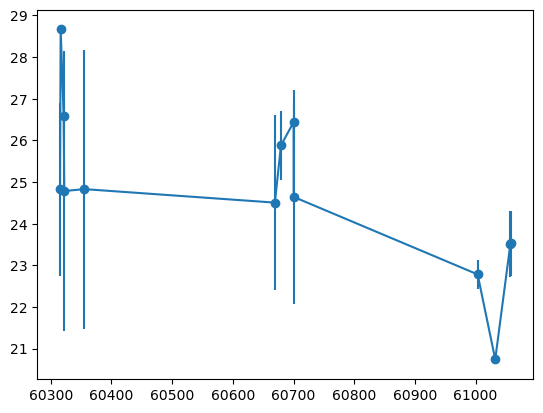

In [220]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from tqdm import tqdm
import pandas as pd
from astropy.io import fits
from astropy.table import Table
# from astropy import units as u
# from astropy.coordinates import SkyCoord
# from astropy.visualization import astropy_mpl_style
main_folder = "Models_results"
dataset_path = "rf-2305222212u"
lc0 = 5
data = fits.open(Path(main_folder, dataset_path, "lightcurves__.fits" ))[1].data
lc = data[data.ID == lc0]
plt.errorbar(lc.time, lc.mag, lc.magerr, marker = "o")
Table(data)